# Lesson: Probability, Generalization, and Inference

## Quick Python Review

Write functions to create reusable code:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def z_score(data_mean: float, data_length: int, null_mean: float) -> float:
    """
    Return the Z-score (standardized statistic) given mean of the data,
      length of the data, and the mean of the null hypothesis.
      Higher Z-scores (greater than 2.0) indicate a more likely 
      significance of the alternative hypothesis.
    """
    null_std = np.sqrt(null_mean * (1 - null_mean) / data_length)
    z_1 = (data_mean - null_mean) / null_std
    return z_1

In [ ]:
print(f'Z-score where null_mean == data_mean: {z_score(0.5, 100, 0.5)}')
print(f'Z-score where null_mean != data_mean: {z_score(0.7, 100, 0.5)}')

## Bayes' Theorem (PA 3.5.1)

Relates the probability of event $A$ given a condition $B$ to the probability of the condition $B$ given that the event $A$ occurred.  Enables $P(B|A)$ to be calculated from $P(A|B)$.

$P(A|B) = \frac{P(B|A) P(A)}{P(B)} = \frac{P(B|A) P(A)}{P(B|A) P(A) + P(B|\bar{A}) P(\bar{A})}$

Let's practice writing a function for Bayes' Theorem and test it using the following example:

Suppose that $1$ out of every $1000$ computer chips produced by a chip manufacturer has a defect. The manufacturer has developed a method to test the chips, but the test is not perfect. If the chip has a defect, the test will correctly discover the defect with probability $0.96$. If the chip does not have a defect, the test will incorrectly report that the chip has a defect with probability $0.02$.

Let $D$ be the event that a chip is defective. Let $T$ be the event that a test indicates a defect. If a particular test indicates a defect, what is the probability that the chip is actually defective?

What parameters should our function have?

In [ ]:
"""
Looking for P(D|T) (true positive probability).

P(D) = 1/1000
P(T|D) = 0.96
P(T|~D) = 0.02

P(~D) = 1 - P(D)
P(D|T) = {P(T|D) * P(D)} / {P(T|D) * P(D) + P(T|~D) * P(~D)}
"""


def bayes_theorem(prob_A: float, prob_B_given_A: float, prob_B_given_not_A: float) -> float:
    """
    Calculate P(A|B) given P(A), P(B|A), and P(B|~A) using Bayes' Theorem.
    """
    prob_not_A = 1 - prob_A
    top_fraction = prob_B_given_A * prob_A
    bottom_fraction = (prob_B_given_A * prob_A) + (prob_B_given_not_A * prob_not_A)
    prob_A_given_B = top_fraction / bottom_fraction
    return prob_A_given_B


bayes_theorem(1/1000, 0.96, 0.02)

## Random Variables

Continuous random variables: measurements that are real numbers.

Discrete random variable: countable number of distinct integral values.

### Mean of discrete random variable
The mean (expected value) of discrete random variable $X$ is defined as: $\mu = E(X) = \sum(X \cdot p(X))$.

Let's make a function that accepts a dataframe with columns $X$ and $p(X)$ and returns the mean. 

In [ ]:
def discrete_rv_mean(series_X: pd.Series, series_pX: pd.Series) -> float:
    """
    Given series of series_X and series_pX representing
      columns X and p(X), calculate the mean assuming a
      discrete random variable X.
    """
    mean = np.sum(series_X * series_pX)
    return mean

Now, let's use it to solve the following problem:

Grace earns money testing websites. Let $X$ represent Grace's weekly earnings. Given the amount of time Grace has available to work each week, Grace estimates that the probability of earning \\$0 a week is 20\%, of \\$100 is 70\%, and of \\$150 is 10\%. What is the mean of $X$?

In [ ]:
weekly_earnings = {
    "X": [0, 100, 150],
    "pX": [0.2, 0.7, 0.1]
}

# for key, value in weekly_earnings.items():
#     print(f'key: {key}')
#     print(f'value: {value}')

df_weekly_earnings = pd.DataFrame.from_dict(weekly_earnings)

df_weekly_earnings.head()

In [ ]:
discrete_rv_mean(df_weekly_earnings['X'], df_weekly_earnings['pX'])

In [ ]:
plt.plot(df_weekly_earnings['X'], df_weekly_earnings['pX'])

### Variance and standard deviation of a discrete random variable

Variance: $\sigma^2 = V(X) = \sum((x - \mu)^2 \cdot p(x))$

Standard deviation: $\sigma = \sqrt{\sigma^2}$

Write a function that calls your previous function of calculating $\mu$ to find $\sigma$, again based on a dataframe that accepts columns $X$ and $p(X)$:

In [ ]:
def discrete_rv_variance(series_X: pd.Series, series_pX: pd.Series) -> float:
    """
    Given series of series_X and series_pX representing
      columns X and p(X), calculate the variance assuming a
      discrete random variable X.
    """
    mu = discrete_rv_mean(series_X, series_pX)
    variance = np.sum(np.square(series_X - mu) * series_pX)
    return variance


def discrete_rv_stdev(series_X: pd.Series, series_pX: pd.Series) -> float:
    """
    Given series of series_X and series_pX representing
      columns X and p(X), calculate the std. dev. assuming a
      discrete random variable X.
    """
    stdev = np.sqrt(discrete_rv_variance(series_X, series_pX))
    return stdev

Now, test it using the problem above regarding Grace the website tester:

In [ ]:
discrete_rv_variance(df_weekly_earnings['X'], df_weekly_earnings['pX'])

In [ ]:
discrete_rv_stdev(df_weekly_earnings['X'], df_weekly_earnings['pX'])

### Using `scipy.stats` instead of writing your own functions

You can actually just use `rv_discrete` objects in the `scipy.stats` library to represent discrete random variables (likewise `rv_continuous` for continuous random variables).  Here's the above examples using `rv_discrete`'s `mean()`, `var()`, and `std()` functions.

In [17]:
import scipy.stats

rv_discrete_uniform = scipy.stats.randint(0, 10)
x = np.arange(0, 11)
rv_discrete_uniform.stats()

(array(4.5), array(8.25))

## Checking distributions in `scipy.stats`

Once you finally have data from your physical model, one way to start building statistical models is to select a distribution closest to the data, given parameter values.  The shape, mean, variance, and standard deviation of your measurements (or counts) will fit some type of distribution.

The `scipy.stats` library has many distributions available (continuous, multivariate, and discrete) for you to help statistically model your problem at hand.

## Continuous random variables

We'll cover continuous random variables, which are generally much more interesting for us, since we can apply them almost everywhere in data-driven engineering.

![image of pdf and cdf](continuous_cdf_pdf.png)

1. What is the pdf (probability distribution function) of a continuous RV?
2. What is the cdf (cumulative distribution function) of a continuous RV?
3. What is the relationship between the pdf $f(x)$ and cdf $F(x)$?

### Properties of continuous random variables

- **mean** $\mu$ or expected value $E(X)$ of continuous RV $X$: $E(X) = \int_a^b x f(x) dx$
- **variance** $\sigma^2$ of continuous RV $X$: $Var(X) = E((X - \mu)^2)$
- **standard deviation** $\sigma$ of continuous RV $X$: $Std(X) = \sqrt{Var(X)}$

### Examples of continuous RV distributions

#### Uniform continuous distribution

Let's check if we can get the above and that they make sense.  We can use the standard uniform distribution `scipy.stats.uniform` which is represented mathematically as $X \sim \text{uniform(0,1)}$:

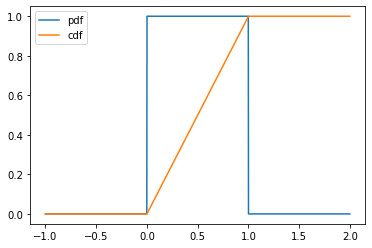

In [32]:
rv_uniform = scipy.stats.uniform()
x_sample = np.arange(-1.0, 2.0, 0.001)
rv_uniform_pdf = rv_uniform.pdf(x)
rv_uniform_cdf = rv_uniform.cdf(x)

plt.plot(x_sample, rv_uniform_pdf, label='pdf')
plt.plot(x_sample, rv_uniform_cdf, label='cdf')
plt.legend()

Let's check the mean and the standard deviation of our uniform pdf both manually and using the built-in `.mean()` and `.std()` functions.  Recall that the mean is the weighted sum or weighted integral $\mu = E(X) = \int_0^1 x f(x) dx$, where $x$ is some value of $X$ and $f(x)$ is the pdf.

We can use `scipy.integrate.quad` to help us compute the definite integral:

In [44]:
rv_uniform_mean = rv_uniform.mean()
print(f'uniform mean distribution from scipy: {rv_uniform_mean}')

import scipy.integrate

rv_uniform_mean_int = scipy.integrate.quad(lambda x: x * rv_uniform.pdf(x), 0, 1)
print(f'uniform mean integrated: {rv_uniform_mean_int}')


# Generic f(x) numerical integration example
def f_x(x: float) -> float:
    return x ** 2 + x / 4 + 5

print(scipy.integrate.quad(lambda x: x * f_x(x), 0, 1))
print(scipy.integrate.quad(lambda x: x ** 3 + x * x / 4 + 5 * x, 0, 1))
print(scipy.integrate.quad(f_x, 0, 1))

uniform mean distribution from scipy: 0.5
uniform mean integrated: (0.5, 5.551115123125783e-15)
(2.833333333333334, 3.1456319031046106e-14)
(2.833333333333334, 3.1456319031046106e-14)
(5.458333333333334, 6.059967342745647e-14)


#### Our beloved Normal distribution

What is a mode in the context of probability distributions?

The normal distribution is represented symbolically as $X \sim N(\mu, \frac{\sigma}{\sqrt{n}})$

In [48]:
sample_data = np.arange(-10., 10., 0.01)
print(sample_data.mean())
print(sample_data.std())
print(scipy.stats.norm.fit(sample_data))
print(scipy.stats.uniform.fit(sample_data))

-0.0050000000002132765
5.773501970208253
(-0.0050000000002132765, 5.773501970208253)
(-10.0, 19.989999999999576)


### Generalizing samples with probability distributions

#### Central Limit Theorem (frequentist)

If we:
- assume randomly selected samples
- assume sample values independent
- assume sample size is large enough
- assume sample size is 10% of the total population

Then the larger the size of each sample from the population, then the distribution of each sample group's mean approaches the Normal distribution.  The CLT justifies generalizing large-sample statistics to the normal distribution in controlled experiments.

We can numerically simulate this by simulating draws from any distribution in `np.random`: